Importing the Dependencies

In [5]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

Data Collection

In [8]:
calories = pd.read_csv('Downloads/calories.csv')

In [9]:
calories.head()


,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [10]:
exercise_data = pd.read_csv('Downloads/exercise.csv')

In [11]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [12]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [13]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [14]:
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data Analysis

In [16]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

<Axes: xlabel='Gender', ylabel='count'>

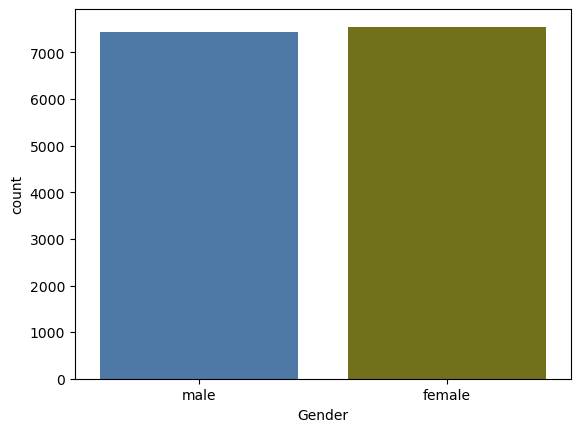

In [18]:
sns.countplot(x='Gender', data=calories_data, hue='Gender', palette=['#3f77b4', '#7f7f0e'],legend=False)

<Axes: xlabel='Age', ylabel='Count'>

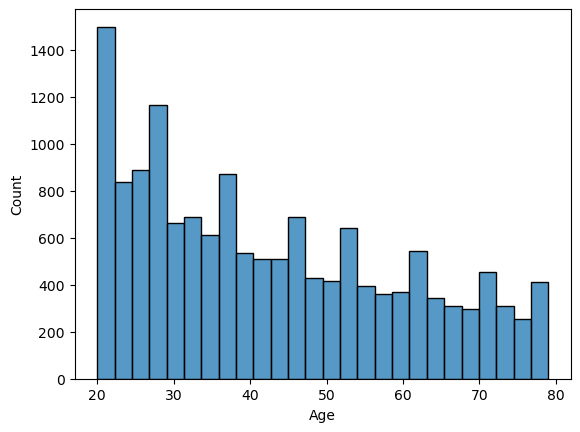

In [19]:
sns.histplot(calories_data['Age'])

<Axes: xlabel='Height', ylabel='Count'>

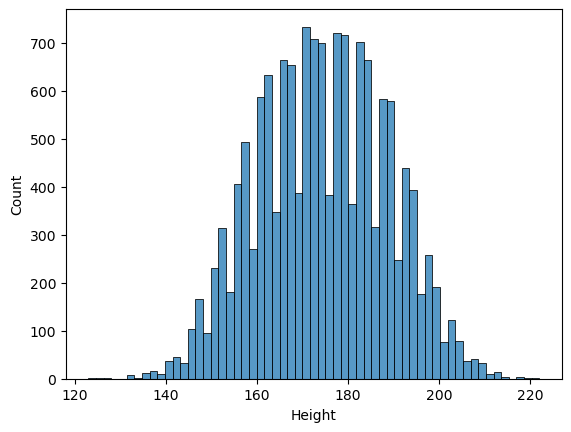

In [20]:
sns.histplot(calories_data['Height'])

<Axes: xlabel='Weight', ylabel='Count'>

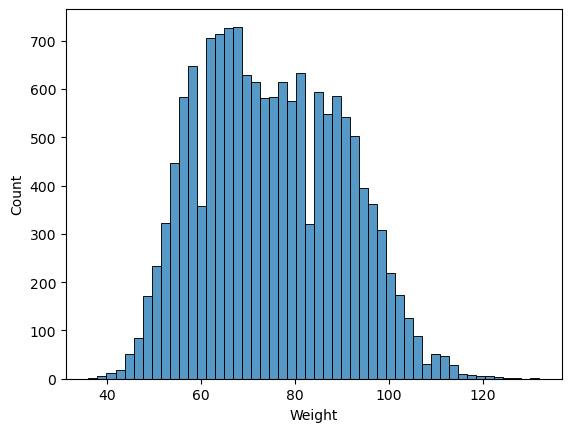

In [21]:
sns.histplot(calories_data['Weight'])

In [22]:
pd.set_option('future.no_silent_downcasting', True)
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

<Axes: >

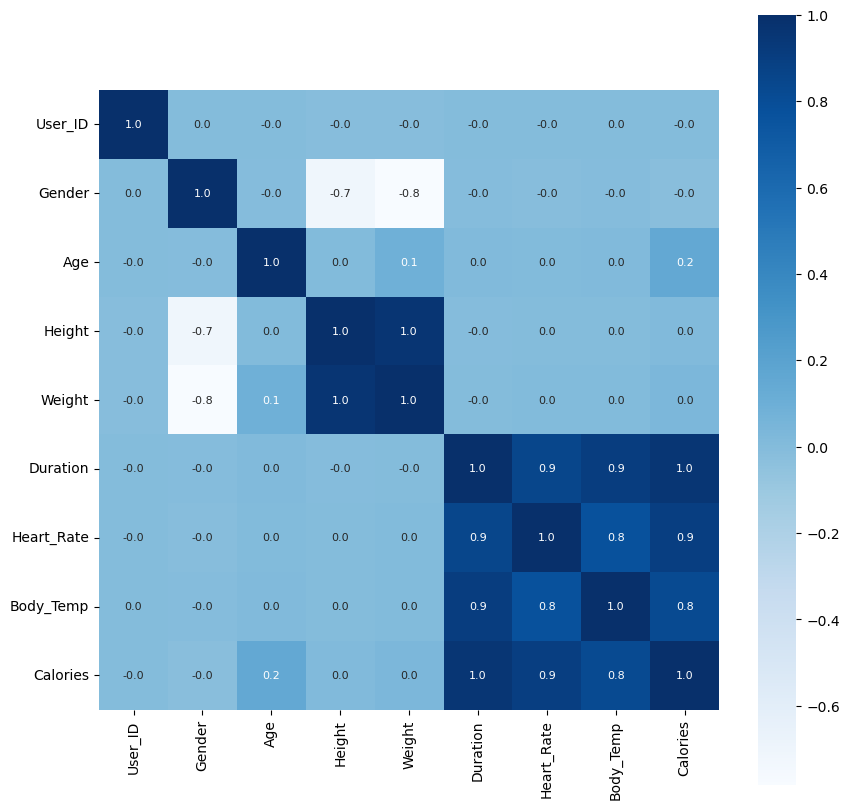

In [23]:
correlation = calories_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Seperating Dependent and Independent Variables

In [25]:
X = calories_data.drop(columns=['User_ID','Calories'], axis=1)
Y = calories_data['Calories']

Splitting the dataset

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Model Training

In [29]:
from xgboost import XGBRegressor
model = XGBRegressor()
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [30]:
Y_pred = model.predict(X_test)

Prediction Stats

In [32]:
comparison_df = pd.DataFrame({
    'Actual Calories': Y_test.values,
    'Predicted Calories': Y_pred,
    'Error (Difference)': Y_test.values - Y_pred
})
print(comparison_df.head())

   Actual Calories  Predicted Calories  Error (Difference)
0            173.0          172.076447            0.923553
1            189.0          195.785797           -6.785797
2             53.0           51.708874            1.291126
3            161.0          162.325150           -1.325150
4            226.0          225.297104            0.702896


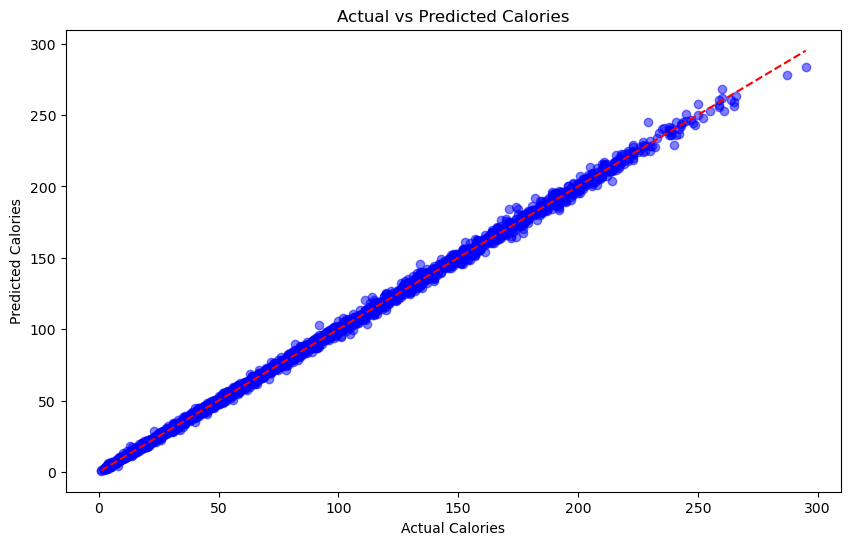

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.title('Actual vs Predicted Calories')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.show()

Evaluation Metrics

In [35]:
mae = metrics.mean_absolute_error(Y_test, Y_pred)
mse=metrics.mean_squared_error(Y_test, Y_pred)
rmse=metrics.root_mean_squared_error(Y_test, Y_pred)
r2_score=metrics.r2_score(Y_test, Y_pred)
print("Mean Absolute Error = ", mae*100)
print("Mean Squared Error = ", mse*100)
print("Root Mean Squared Error = ", rmse*100)
print("R2 Score = ", r2_score*100)

Mean Absolute Error =  149.84578529596328
Mean Squared Error =  456.81197850304864
Root Mean Squared Error =  213.73160236685837
R2 Score =  99.88680981634738


Saving the trained model

In [37]:
import pickle

In [38]:
filename = 'trained_model.sav'
pickle.dump(model, open(filename,'wb')) #binary format

Loading the model

In [40]:
loaded_model=pickle.load(open('trained_model.sav','rb'))

In [41]:
input_data = (0,68,190.0,94.0,29.0,105.0,40.8)  # Example input

input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)

# Applying one-hot encoding
input_df = pd.DataFrame([input_data], columns=X.columns)  # Match input format to training data
input_df = pd.get_dummies(input_df, drop_first=True)

input_df = input_df.reindex(columns=X_train.columns, fill_value=0)

# Make the prediction
prediction = loaded_model.predict(input_df)
calorie_value = prediction[0]

# Interpret and display the output
if calorie_value > 300:
    print(f'The person burnt a good amount of calories: {calorie_value:.2f} calories')
else:
    print(f'The person did not burn a lot of calories: {calorie_value:.2f} calories')

The person did not burn a lot of calories: 234.32 calories
